In [22]:
import mogptk

m1_real=mogptk.LoadModel("first_real2")
m2_real=mogptk.LoadModel('second_real2')
m3_real=mogptk.LoadModel('third_real2')
m4_real=mogptk.LoadModel('fourth_real2')
m1_im=mogptk.LoadModel('first_im2')
m2_im=mogptk.LoadModel('second_im2')
m3_im=mogptk.LoadModel('third_im2')
m4_im=mogptk.LoadModel('fourth_im2')

In [24]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq

In [25]:
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return 10*func1(t)+5

In [26]:
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))

[355.  356.2 357.4 358.6 359.8 361. ]


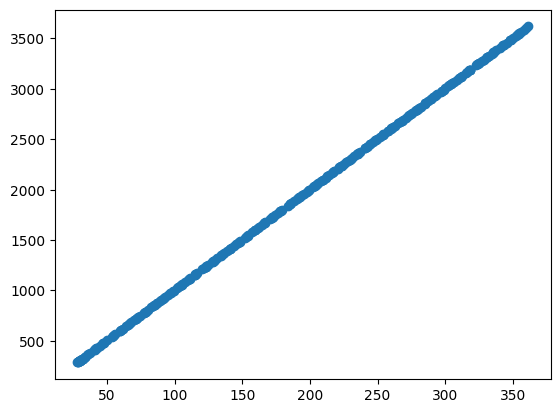

In [27]:
#plotting low-fidelity to high-fidelity
print(x_train[49])
f1 = []
f2 = []
for i in x_train:
    values1 = []
    values2 = []
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)

flat_x = [x for xs in f1 for x in xs]
flat_y = [x for xs in f2 for x in xs]
plt.scatter(flat_x, flat_y)
plt.savefig('low_f_to_high_f.png')

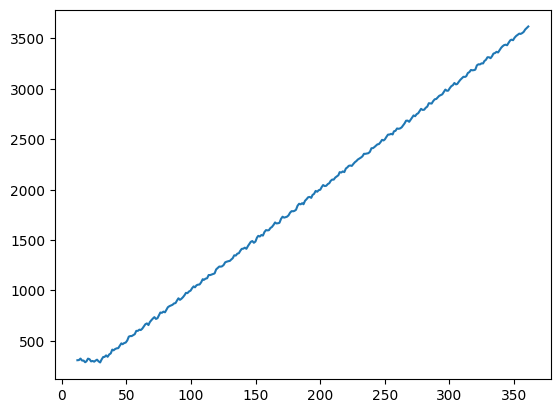

In [28]:
x_points=np.asarray(x_train)
x_points=x_points.flatten()
plt.plot(x_points,flat_y)
plt.savefig("simple_experiments_h_f.png")

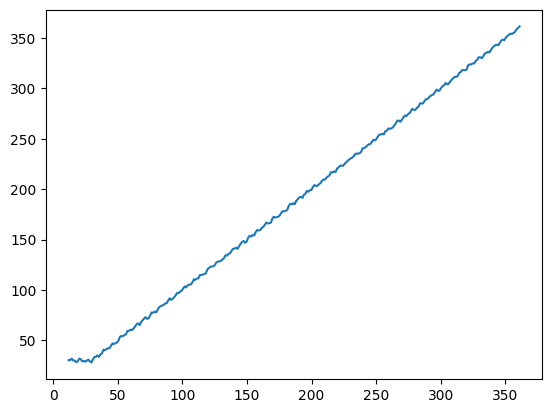

In [29]:
plt.plot(x_points, flat_x)
plt.savefig('simple_experiments_low_f.png')

In [30]:
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]

vis_real_1=[]
vis_real_2=[]
vis_imag_1=[]
vis_imag_2=[]

for i in range(num_training_samples):
    value1=rfft(f1[i])
    value2=rfft(f2[i])
    f1_real.append([i.real for i in value1])
    
    
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])
    
    
x_train_real=torch.tensor(np.asarray(f1_real))
x_train_imag=torch.tensor(np.asarray(f1_imag)[:,1:3])

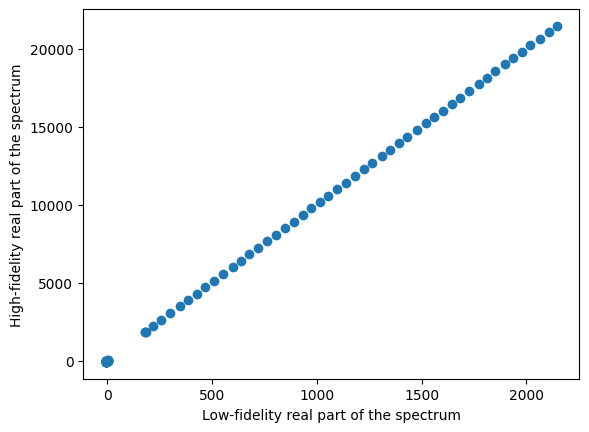

In [31]:
#relation between real parts of the spectrum between low and high-fidelity functions
flat_sig1 = [x for xs in f1_real for x in xs]
flat_sig2 = [x for xs in f2_real for x in xs]
plt.scatter(flat_sig1, flat_sig2)
plt.xlabel("Low-fidelity real part of the spectrum")
plt.ylabel("High-fidelity real part of the spectrum")
plt.savefig("simple_relation_real.jpeg")


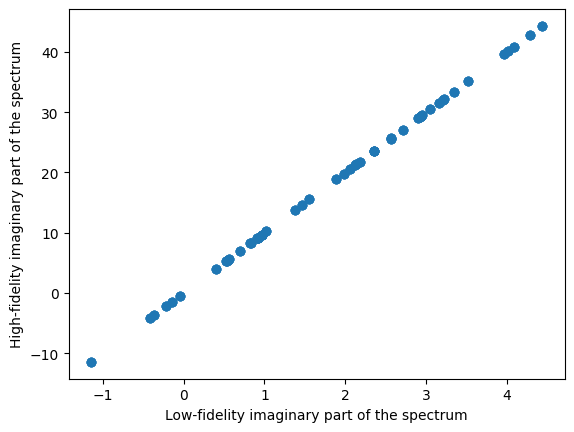

In [35]:
#relation between imaginary parts of the spectrum between low and high-fdelity functions
flat_sig1i = [xs[2] for xs in f1_imag for x in xs]
flat_sig2i = [xs[2] for xs in f2_imag for x in xs]
plt.scatter(flat_sig1i, flat_sig2i)
plt.xlabel("Low-fidelity imaginary part of the spectrum")
plt.ylabel("High-fidelity imaginary part of the spectrum")
plt.savefig("simple_relation_imag.jpeg")

1 input dimensions
None active dimensions
None input dimensions
None active dimensions
1 kernel input dims
IndependentMultiOutputKernel[0].SpectralMixtureKernel.magnitude=[0.0942935062268588, 0.42599575538211576, 0.9842365724335385, 0.7879404744075239, 0.7050243743683037, 0.6575804185158167, 0.5646483069981479, 1.031393604103878, 0.7160038986652377, 0.12488590918003441, 0.2333613913854458, 0.3918090260264801, 0.6261595319410297, 1.0378312197679769, 0.9022419366842516]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.mean=[[1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08]]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.variance=[[0.699400044957953], [0.3807594613727975], [0.7735486588895928], [0.2278590284377527], [0.6477582508263503], [0.709371337679311], [0.22183296808616346], [0.1514683912296553], [0.7762356356148371], [0.46805703959328343], [0.17027090005899367], [0.5035733005589828], [0.

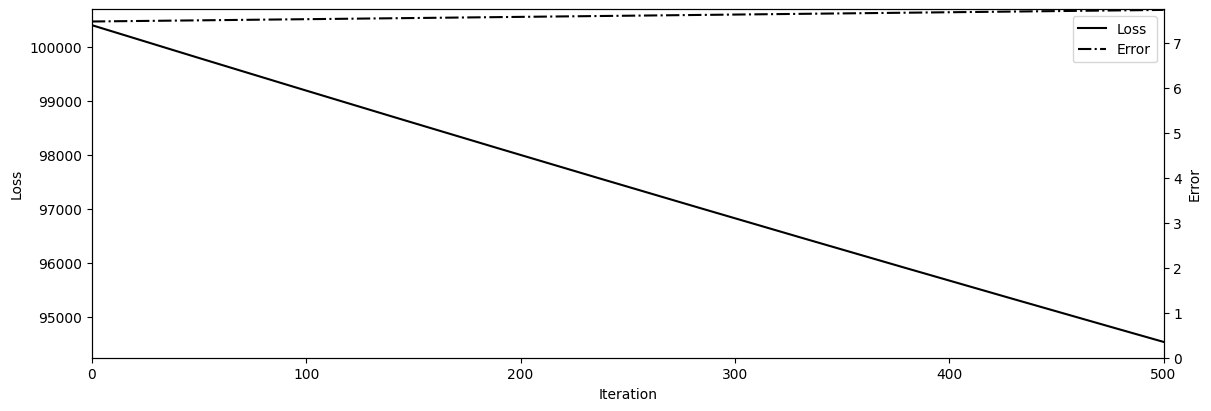

In [62]:

test_d=np.linspace(1,200,200)
test_y=np.linspace(1,200,200)
data=mogptk.DataSet(test_d, test_y)
model=mogptk.SM(data, Q=15)
model.train(method="Adam", plot=True, iters=500, error="MAE")
for i in model.parameters():
    print(i)

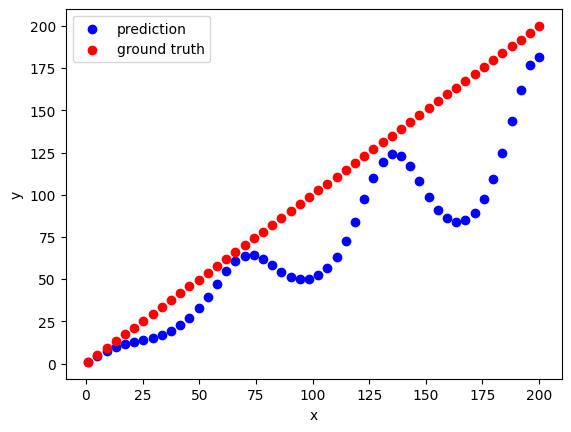

In [63]:
tr=np.linspace(1,200,50)
output=model.predict(tr)
plt.scatter(tr, output[1],c="b", label="prediction")
plt.scatter(tr, tr, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("sm_linear_200.jpeg")

In [59]:
#def func1(t):
 #   return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

#def func2(t):
 #   return (torch.relu(func1(t))+ torch.sigmoid(func1(t)))
 
#prediction with custom kernel
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return 10*func1(t)+5
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))


#(x_train[398], "training", x_train[399])

f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]
for i in range(num_training_samples):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(x_train[i])):
        real_train.append(x_train[i][p])

    # real_train= np.concatenate(np.asarray(real_train), np.asarray(points[i]))
    f1_real.append(real_train)

    real_train2 = []
    imag_train2 = []
    for k in value2:
        real_train2.append(k.real)
        imag_train2.append(k.imag)

    f2_real.append(real_train2)
    f2_imag.append(imag_train2)





x_train_real=torch.tensor(np.asarray(f1_real))

In [60]:
model1_k_real=mogptk.LoadModel("first_real_kernel2")
model2_k_real=mogptk.LoadModel("second_real_kernel2")
model3_k_real=mogptk.LoadModel("third_real_kernel2")
model4_k_real=mogptk.LoadModel("fourth_real_kernel2")

model1_k_imag=mogptk.LoadModel("first_im_kernel2")
model2_k_imag=mogptk.LoadModel("second_im_kernel2")
model3_k_imag=mogptk.LoadModel("third_im_kernel2")
model4_k_imag=mogptk.LoadModel("fourth_im_kernel2")

_,real_k,_,_=model1_k_real.predict(x_train_real)
_,real2_k,_,_=model2_k_real.predict(x_train_real)
_,real3_k,_,_=model3_k_real.predict(x_train_real)
_,real4_k,_,_=model4_k_real.predict(x_train_real)

_,im1_k,_,_=model1_k_imag.predict(x_train_real)
_,im2_k,_,_=model2_k_imag.predict(x_train_real)
_,im3_k,_,_=model3_k_imag.predict(x_train_real)
_,im4_k,_,_=model4_k_imag.predict(x_train_real)

In [61]:
x_train_real.shape

torch.Size([50, 14])

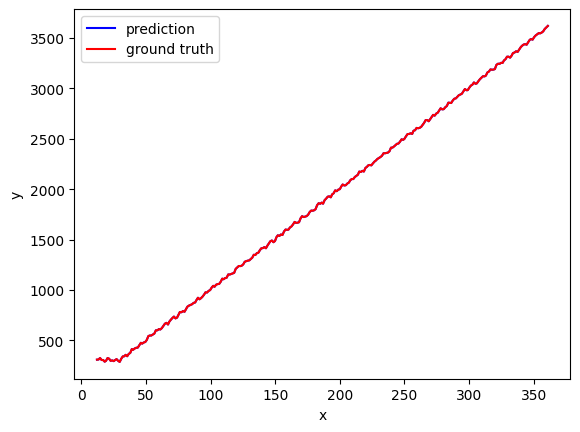

In [63]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
vals=values.flatten()
x_points=x_train.flatten()
values2=np.asarray(f2).flatten()
plt.plot(x_points, vals, c="b", label="prediction")
plt.plot(x_points, values2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("simple_custom_kernels.jpeg")

In [ ]:
#prediction with sm kernel

In [71]:
m1_real=mogptk.LoadModel("first_real2")
m2_real=mogptk.LoadModel('second_real2')
m3_real=mogptk.LoadModel('third_real2')
m4_real=mogptk.LoadModel('fourth_real2')
m1_im=mogptk.LoadModel('first_im2')
m2_im=mogptk.LoadModel('second_im2')
m3_im=mogptk.LoadModel('third_im2')
m4_im=mogptk.LoadModel('fourth_im2')

def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return 10*func1(t)+5
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))


#(x_train[398], "training", x_train[399])

f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]
for i in range(num_training_samples):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(x_train[i])):
        real_train.append(x_train[i][p])

    # real_train= np.concatenate(np.asarray(real_train), np.asarray(points[i]))
    f1_real.append(real_train)

    real_train2 = []
    imag_train2 = []
    for k in value2:
        real_train2.append(k.real)
        imag_train2.append(k.imag)

    f2_real.append(real_train2)
    f2_imag.append(imag_train2)



f1_real=np.asarray(f1_real)
f1_real=np.delete(f1_real, 1,1)
f1_real=np.delete(f1_real,6,1)

x_train_real=torch.tensor(np.asarray(f1_real))

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_real)
_,im2,_,_=m2_im.predict(x_train_real)
_,im3,_,_=m3_im.predict(x_train_real)
_,im4,_,_=m4_im.predict(x_train_real)

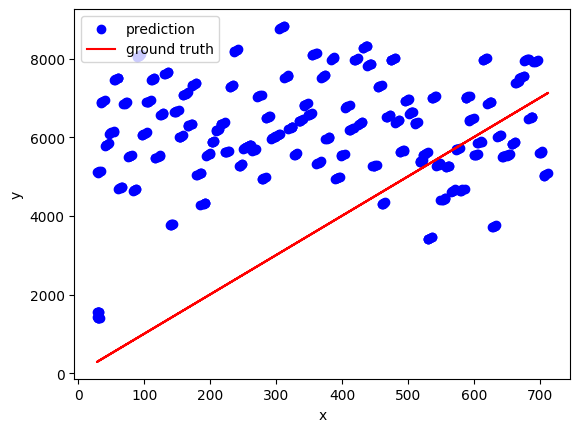

In [20]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 
from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()

plt.scatter(flat_x, values2, label="prediction", c="b")
plt.plot(flat_x, np.asarray(f2).flatten(), label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("simple_sm_kernel.jpeg")

:wq
